References:
- _Kaggle_
- _Python for Data Analysis: Data Wrangling with Pandas, NumPy and IPython (Wes McKinney)_

<font size="5" color='blue'>Chapter 1: Loading data</font>

<font size="4" color='blue'>A. Loading data from SQL</font> 

In [143]:
#example: create a SQLite database
import sqlite3
query = """
CREATE TABLE IF NOT EXISTS test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""
con = sqlite3.connect('mydata.sqlite')
#con.execute(query)
#con.commit()

#insert a few rows of data *NEED TO LEARN SQL SYNTAX*
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [144]:
data

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [145]:
#Read data from SQLAlchemy
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
3,Atlanta,Georgia,1.25,6
4,Tallahassee,Florida,2.60,3
5,Sacramento,California,1.70,5
6,Atlanta,Georgia,1.25,6
7,Tallahassee,Florida,2.60,3
8,Sacramento,California,1.70,5


<font size="5" color='blue'>Chapter 2: Data problems</font> 

<font size="4" color='blue'>A. Missing values</font> 

All of the descriptive statistics on pandas objects exclude missing data by default. Pandas uses the __floating-point__ value NaN (Not a Number) to represent missing data.


<font size="3">__1. How many missing values?__</font> 


In [146]:
import pandas as pd
import numpy as np
nfl_data = pd.read_csv(r"C:\Users\hient\Documents\Kaggle\data\data.csv.csv")

C:\Users\hient\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [147]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [148]:
#.isnull(): Return boolean values (True/False)
nfl_data.isnull()
#how many missing values per column
missing_values_count = nfl_data.isnull().sum()
#look at the missing values in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [149]:
#percent of data that is missing
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.87214126835169


<font size="3">__2. Figure out why the data is missing?__</font> 

--> READ the dataset documentation

--> Look at each column individually 

_"Is this value missing because it wasn't recorded or because it doesn't exist?"_

If a value is missing because it doesn't exist (like the height of the oldest child of someone who doesn't have any children), it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. 

If a value is missing because it wasn't recorded, try to guess what it might have been based on the other values in that column and row. This is called __imputation__.

BE CAREFUL! Removing some useful information or adding some noise to your data.

<font size="2">__2.1 Dropping missing values__</font> (not recommended!)

In [150]:
#drop NAs (drop rows by default)
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [151]:
#drop rows that are all NAs
nfl_data.dropna(how="all")

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [152]:
# remove all columns (axis=1) with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [153]:
#remove all columns (axis=1) that are all NAs
nfl_data.dropna(axis=1, how='all')

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [154]:
#how much data did we lose? %d: integer
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


<font size="2">__2.2 Filling in missing values__</font> 

In [155]:
nfl_data.fillna(0)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.0,15:00,15,3600.0,0.0,TEN,...,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,0.0,00:28,1,28.0,4.0,BAL,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


In [156]:
#Calling fillna with a dictionary, you can use a different fill value for each column
nfl_data.fillna({"down": 0.5, "yacEPA": 0})

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.5,15:00,15,3600.0,0.0,TEN,...,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,0.5,00:28,1,28.0,4.0,BAL,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [157]:
#modify the existing object with fillna
_ = nfl_data.fillna(0, inplace=True)
nfl_data

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,0.0,15:00,15,3600.0,0.0,TEN,...,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,0.0,00:28,1,28.0,4.0,BAL,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


In [158]:
#interpolation with fillna (different dataset)
#.loc gets rows (and/or columns) with particular labels.
#.iloc gets rows (and/or columns) at integer locations (ONLY INTEGERS).

from numpy import nan as NA
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA 
df.iloc[4:, 2] = NA
df

,0,1,2
0,-1.576028,1.883037,-0.704902
1,-0.397196,1.146455,-1.467514
2,-0.213144,NaN,-0.785482
3,1.480570,NaN,0.132848
4,0.701929,NaN,NaN
5,1.675906,NaN,NaN


In [159]:
#interpolation with fillna
df.fillna(method='ffill')

,0,1,2
0,-1.576028,1.883037,-0.704902
1,-0.397196,1.146455,-1.467514
2,-0.213144,1.146455,-0.785482
3,1.480570,1.146455,0.132848
4,0.701929,1.146455,0.132848
5,1.675906,1.146455,0.132848


In [160]:
#interpolation with fillna, limit = 1
df.fillna(method='ffill', limit=1)

,0,1,2
0,-1.576028,1.883037,-0.704902
1,-0.397196,1.146455,-1.467514
2,-0.213144,1.146455,-0.785482
3,1.480570,NaN,0.132848
4,0.701929,NaN,0.132848
5,1.675906,NaN,NaN


<font size="4" color='blue'>B. Scaling and Normalization</font> 

__Scaling__: changing the __range__ of your data

__Normalization__: changing the __shape__ of the distribution of your data.

<font size="3">__1. Scaling__</font> 

Transforming your data so that it fits within a specific scale, like 0-100 or 0-1.

Measures how far apart data points are (support vector machines (SVM) or k-nearest neighbors (KNN)).

You might be looking at the prices of some products in both Yen and US Dollars. 1 USD = 100 Yen, but if you don't scale your prices, methods like SVM or KNN, will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! With currency, you can convert between currencies.

But what about if you're looking at something like height and weight?

In [161]:
# generate 1000 data points randomly drawn from an exponential distribution (the length of time a product lasts)
original_data = np.random.exponential(size=1000)
original_data

array([3.06239109e-01, 9.57699988e-01, 1.63899262e-01, 6.02701152e-01,
       1.87183547e-02, 2.17673758e+00, 1.99984643e-01, 1.33113490e+00,
       8.19075918e-01, 1.38931470e+00, 3.64352584e-01, 1.02510487e+00,
       6.65313833e-01, 1.89425994e-01, 4.08703966e-02, 2.42587384e-01,
       9.64174396e-01, 1.28457877e+00, 1.09172729e+00, 9.24604854e-02,
       1.16676510e-01, 1.65267874e-01, 1.78676381e+00, 7.83350065e-02,
       9.70748609e-01, 6.78757754e-01, 5.95128271e-01, 1.04224048e-01,
       1.34146207e-01, 6.11664048e-01, 2.60144709e+00, 1.34358452e-01,
       9.71251898e-01, 8.72121999e-01, 1.52679260e+00, 8.41245289e-01,
       2.19542973e-01, 4.20556707e-01, 3.47371700e-01, 3.38746617e-01,
       5.17648616e+00, 1.21472239e+00, 5.44499756e-01, 8.47496697e-01,
       1.29882014e+00, 4.83027565e-01, 2.39486470e+00, 2.44958806e-01,
       4.13760118e-01, 3.09183454e-01, 1.21490978e+00, 5.50815965e-01,
       1.37220932e+00, 9.62111574e-01, 1.33184701e-01, 6.89941619e-02,
      

In [162]:
# scale the data between 0 and 1
from mlxtend.preprocessing import minmax_scaling
scaled_data = minmax_scaling(original_data, columns=[0])
scaled_data

array([[4.70213869e-02],
       [1.47277363e-01],
       [2.51161261e-02],
       [9.26451419e-02],
       [2.77364316e-03],
       [3.34880039e-01],
       [3.06694530e-02],
       [2.04746788e-01],
       [1.25943939e-01],
       [2.13700314e-01],
       [5.59647070e-02],
       [1.57650576e-01],
       [1.02280863e-01],
       [2.90445392e-02],
       [6.18271139e-03],
       [3.72257628e-02],
       [1.48273736e-01],
       [1.97582075e-01],
       [1.67903373e-01],
       [1.41221210e-02],
       [1.78488239e-02],
       [2.53267474e-02],
       [2.74865382e-01],
       [1.19482933e-02],
       [1.49285469e-01],
       [1.04349803e-01],
       [9.14797203e-02],
       [1.59324637e-02],
       [2.05373071e-02],
       [9.40244787e-02],
       [4.00240322e-01],
       [2.05699702e-02],
       [1.49362922e-01],
       [1.34107417e-01],
       [2.34857350e-01],
       [1.29355674e-01],
       [3.36793642e-02],
       [6.46141890e-02],
       [5.33514492e-02],
       [5.20241001e-02],


Text(0.5, 1.0, 'Scaled data')

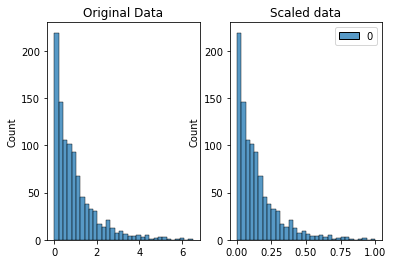

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

#2 Figures and Axes
fig, ax = plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0]) #ax[0]:left; ax[1]:right
sns.histplot(scaled_data, ax=ax[1])

#set titles
ax[0].set_title("Original Data")
ax[1].set_title("Scaled data")

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8, it now ranges from 0 to 1.

<font size="3">__2. Normalization__</font> 

A statistics technique that assumes your data is normally distributed

___Box-Cox Transformation___

Text(0.5, 1.0, 'Normalized data')

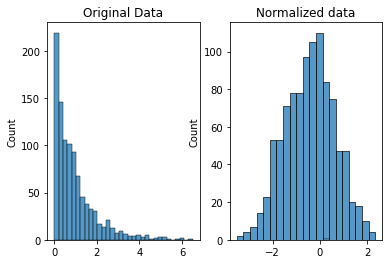

In [164]:
# for Box-Cox Transformation
from scipy import stats
import matplotlib
normalized_data = stats.boxcox(original_data)

fig, ax = plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0]) #ax[0]:left; ax[1]:right
sns.histplot(normalized_data, ax=ax[1], legend=None)

#set titles
ax[0].set_title("Original Data")
ax[1].set_title("Normalized data")

<font size="4" color='blue'>C. Parsing dates</font> 

In [165]:
# read in our data
landslides = pd.read_csv(r"catalog.csv")
landslides.head()

FileNotFoundError: [Errno 2] No such file or directory: 'catalog.csv'

In [ ]:
#check data type of date
landslides['date'].dtype

https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind
--> O: object. Datatype is not M (datetime).

https://strftime.org/
Format: month/day/two-digit year (%m/%d/%y)

In [ ]:
# create a new column (date_parsed) with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")
landslides.head()

In [ ]:
# infer_datetime_format = True (option 2)
# don't recommend! not figure out the correct date format!
landslides['date_parsed_2'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)
landslides.head()

In [ ]:
#check if parsing dates is working by writing the plot of day from 1 to 31
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

#remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

#plot the day of the month
#sns.histplot(day_of_month_landslides, kde=False, bins=31)
sns.histplot(day_of_month_landslides, bins=31)

--> make sense!!!

<font size="4" color='blue'>D. Inconsistent Data Entry</font> 

In [ ]:
# read in all our data
professors = pd.read_csv(r"C:\Users\hient\OneDrive - National University of Ireland, Galway\Documents\data analytics\Kaggle\data\pakistan_intellectual_capital.csv")
professors.head()

In [ ]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

__Inconsistent data entry__: ' Germany' and 'germany', ' New Zealand' and 'New Zealand', 'South Korea' and 'SouthKorea'

In [ ]:
# remove white spaces
professors['Country'] = professors['Country'].str.strip()

# fuzzywuzzy package to identify which strings are closest to each other
import fuzzywuzzy
from fuzzywuzzy import process
# get the top 10 closest matches to "South Korea"
matches = fuzzywuzzy.process.extract("South Korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches
# matches[0]

--> a ratio of > 47

In [ ]:
# how to replace 
# write a function to avoid repeating
def replace_match(dataframe, column, string_to_match, min_ratio=0):
    # get all the unique values in the 'Country' column
    countries = dataframe[column].unique()
    
    # get the top 10 closest matches to string_to_match
    matches = fuzzywuzzy.process.extract(string_to_match, countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    
    # only get matches with min ratio
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    
    #for matches in matches:
    #    if matches[1] >= min_ratio:
    #        close_matches = matches[0]        
    # print(close_matches)
    
    #selecting rows with having a particular value in a particular column
    #https://www.w3resource.com/pandas/dataframe/dataframe-isin.php
    rows_with_matches = dataframe[column].isin(close_matches) #return True/False
    #print (rows_with_matches)
    
    #replace: https://www.w3resource.com/pandas/dataframe/dataframe-loc.php
    dataframe.loc[rows_with_matches, column] = string_to_match
    print("Done!")


In [ ]:
replace_match(dataframe=professors, column='Country', string_to_match="South Korea",min_ratio=45)

In [ ]:
# check new values in Country column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries